
# Homework 5: Bootstrapping, Hypothesis Testing, and Regression
***

**Name**: Tristan Thomas

***

This assignment is due on Moodle by **11:59 PM on Friday 17 April**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**. 

**NOTES**: 

- Any relevant data sets should be available under the **Data** module on Canvas, as well as in the zipped folder in which you obtained this assignment. 
- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Because you can technically evaluate notebook cells in a non-linear order, it's a good idea to do Kernel $\rightarrow$ Restart & Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- You **MUST** leave all of your notebook cells **evaluated** so the graders do not need to re-evaluate them. For 100+ students, this extra time adds up, and makes the graders' lives unnecessarily more difficult.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 
- Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. 


In [1]:
import numpy as np
import math
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

---

### [20 points] Problem 1 - Hypothesis Testing: Knowledge Check

You are working as a Data Scientist for an internet company. Your co-worker, Bob Dob, is a lovable scamp! Unfortunately, he also makes a lot of mistakes throughout the day as the two of you team up to tackle some inference work regarding your company's customers. In each case, clearly explain why Bob's hypothesis testing setup or conclusion is incorrect.

**Part A**: Bob has some data on the characteristics of customers that visited the company's website over the previous month.  He wants to perform an analysis on the proportion of last month's website visitors that bought something.  

Let $X$ be the random variable describing the number of website visitors who bought something in the previous month, and suppose that the population proportion of visitors who bought something is $p$. Bob is particularly interested to see if the data suggests that more than 20% of website visitors actually buy something.  He decides to perform the test with a null hypothesis of $H_0: \hat{p} = 0.20$, where $\hat{p}$ is the sample proportion.

The objective of hypothesis testing is to choose, based on sample data, between two competing hyptheses about the value of a $population$ parameter. In this case, Bob wants to determine if the sample data suggests that the population proportion is more than 20%. Instead of using $\hat{p}$, Bob should use $p$ and make the following adjustment to the hypothesis: $H_0: p = 0.20$.



**Part B**: Bob decides instead to do his hypothesis test with a null hypothesis of $H_0: p > 0.2$.

The null hypothesis must be the status quo in order for the burden of proof to be placed on those that believe the alternative claim. If Bob is looking to find if the population proportion is more than 20%, he must assume the status quo is $p=0.20$ and preform a right-tail test to find the if the population proportion is $more$ than 20%. By using $H_0:p>0.2$, Bob is making the assumption that the population proportion is already greater than 20%, which is an invalid assumption and will lead to an invalid test.

**Part C**: Finally on track with reasonable hypotheses of $H_0: p = 0.20$ and $H_1: p > 0.20$, Bob computes a normalized test-statistic of $z = -1.5$ for the sample proportion and concludes that since $-1.5 < 0.05$ there is sufficient statistical evidence at the $\alpha = 0.05$ (95%) significance level that the proportion of customers who buy something is less than 15%.

In Bob's conclusion, he compared his normalized test-statistic against his alpha value. This is an invalid comparison. What Bob must do instead is find the $z$-critical value that corresponds with an alpha value of 0.05. This can be found in a lookup table or by using the python stats.norm.ppf function. Bob must then compare his test statistic against the $z$-critical value in order to determine if there is sufficient statistical evidence to support his alternative hypothesis.

**Part D**: Bob is again conducting the hypothesis test of $H_0: p = 0.20$ and $H_1: p > 0.20$. He computes a p-value of $0.06$, and thus concludes that there is only a 6% probability that the null hypothesis is true. 

A $p$-value is defined as the probability of observing data at least as extreme as our sample statistic given that $H_0$ is true. In this scenario, it represents the probability of observing data greater than 0.2 given that the population proportion is equal to 0.2. It is incorrect to interpret the $p$-value as the probability that the null hypothesis is true. Instead, Bob should interpret it as there being a 6% chance of observing data greater than 0.2 given that the population proportion is greater than 0.2.

---


### [30 points] Problem 2 - Naps vs Coffee for Memory? 

It is estimated that [about 75% of adults](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4997286/) in the United States drink coffee. Often, coffee is used to replace the need for sleep. It works alright, or so we think. Let's find out, in this exciting homework problem!

[One recent study](https://www.sciencedirect.com/science/article/pii/S1388245703002554) investigated the effects of drinking coffee, taking a nap, and having a ["coffee-nap"](https://lifehacker.com/naps-vs-coffee-which-is-better-when-youre-exhausted-1730643671) - the practice of drinking some coffee *and then* having a short nap. The study broke participants up into three groups of 10 participants each, where the groups would have a nap, or have a coffee, or have a coffee-nap, then perform a task where their reaction time was measured. In previous experiments the mean reaction time measurement was found to be normally distributed. The reaction time means (milliseconds, ms) and standard deviations for the three groups of participants are given in the table below.

$$
\begin{array}{c|c|c|c}
\textrm{Group} & \textrm{Sample Size} & \textrm{Mean} & \textrm{Standard Deviation} \\
\hline 
\textrm{Coffee+Nap} & 10 & 451.3 & 31.9 \\ 
\textrm{Coffee} & 10 & 494.2 & 39.6 \\ 
\textrm{Nap} & 10 & 492.8 & 45.2 \\ 
\end{array}
$$

**Part A**: Compute a 95% t-confidence interval for the mean reaction time measurement for participants in each of these three groups. (You should find three separate confidence intervals.) Do all computations in Python by hand, and report the results.

1. Can you make any conclusions regarding whether coffee, naps or both (coffee-naps) are better for faster reaction times?
2. Why did we use a t-distribution?

Confidence interval : $$[\bar{x}-t_{\alpha/2}\cdot \frac{s}{\sqrt{n}},\bar{x}+t_{\alpha/2}\cdot \frac{s}{\sqrt{n}} ]$$ 
\
Critical $t$-values: stats.t.ppf(1-$\frac{\alpha}{2}$, df = $n-1$) \
95% Confidence Interval For **Coffee+Nap**: $[428.4801,474.1199]$\
95% Confidence Interval For **Coffee**: $[465.8719,522.5281]$\
95% Confidence Interval For **Nap**: $[460.4659,525.1341]$


1. It is difficult to make conclusions when you are comparing multiple confidence intervals against eachother. This is due to there being overlap in the intervals. With that being said, it appears that a coffee-nap may be better for faster reaction times. The confidence intervals for naps and coffee seperately are very similary and it is difficult to say whether one is better or worse than the other. However, with a small amount of overlap, the confidence interval for coffee-naps appears to show faster reaction times than coffee and naps seperately.
2. We used a t-distribution because we are observing a normally distributed population where the $\sigma$ is unknown. When we are given normal data with unknown $\sigma$, we use a t-distribution when the sample size is less than 30. In this case, our sample size was 10.

In [406]:
alpha = 1-0.95
n = 10
coffeeAndNapStdDev = 31.9
coffeeAndNapMean = 451.3
coffeeStdDev = 39.6
coffeeMean = 494.2
napStdDev = 45.2
napMean = 492.8
tVal = stats.t.ppf(1-(alpha/2),df=n-1)
coffeeAndNapLowerCI = coffeeAndNapMean - (tVal*(coffeeAndNapStdDev/math.sqrt(n)))
coffeeAndNapUpperCI = coffeeAndNapMean + (tVal*(coffeeAndNapStdDev/math.sqrt(n)))
print("Coffee & Nap: [",coffeeAndNapLowerCI,",",coffeeAndNapUpperCI,"]")
coffeeLowerCI = coffeeMean - (tVal*(coffeeStdDev/math.sqrt(n)))
coffeeUpperCI = coffeeMean + (tVal*(coffeeStdDev/math.sqrt(n)))
print("Coffee: [",coffeeLowerCI,",",coffeeUpperCI,"]")
napLowerCI = napMean - (tVal*(napStdDev/math.sqrt(n)))
napUpperCI = napMean + (tVal*(napStdDev/math.sqrt(n)))
print("Nap: [",napLowerCI,",",napUpperCI,"]")

Coffee & Nap: [ 428.48011470011295 , 474.1198852998871 ]
Coffee: [ 465.8718665242781 , 522.5281334757218 ]
Nap: [ 460.46586785094377 , 525.1341321490563 ]


**Part B**: Use an appropriate hypothesis test to determine if there sufficient evidence, at the $\alpha = 0.05$ significance level, to conclude that taking a nap promotes faster reaction time than drinking coffee.  Be sure to clearly explain the test that you're doing and state all hypotheses. Do all computations in Python, and report results.

For this problem, we will be testing the likelihood that the mean reaction time of taking a nap is less than the mean reaction time of drinking coffee (494.2 ms). Our null hypothesis is $H_0:\mu_{nap}=494.2ms$ and our alternative hypothesis is $H_a:\mu_{nap}<494.2ms$. We will be conducting a lower-tail test on these hypotheses.

In [18]:
xBar = 492.8
mu = 494.2
s = 45.2
alpha = 0.05
n = 10
tStat = (xBar-mu)/(s/math.sqrt(n))
pValue = stats.t.cdf(tStat,df=n-1)
print("p-value=",pValue)
if pValue<alpha:
    print("Reject Null")
else:
    print("Accept Null")

p-value= 0.46206067211368507
Accept Null


Using the above stated hypotheses, I performed a lower-tail test. I found the p-value to be 0.4621. This value is greater than our alpha value of 0.05. Therefore we accept our null hypothesis and can state that there is not statistical evidence to support that claim that taking a nap promotes faster reaction time than drinking coffee.

**Part C**: Use an appropriate hypothesis test to determine if there is sufficient evidence, at the $\alpha = 0.05$ significance level, to conclude that taking a coffee-nap promotes faster reaction time than only drinking coffee, or only having a nap.  Be sure to clearly explain the test that you're doing and state all hypotheses. Do all computations in Python, and report results.

For this problem, we will be testing the likelihood that the mean reaction time of taking a coffee-nap is less than the mean reaction time of drinking coffee (494.2 ms) or taking a nap (492.8 ms). Our first null hypothesis is $H_0:\mu_{C+N}=494.2ms$ and our alternative hypothesis is $H_a:\mu_{C+N}<494.2ms$. We will be conducting a lower-tail test on these hypotheses. Our second null hypothesis is $H_0:\mu_{C+N}=492.8ms$ and our alternative hypothesis is $H_a:\mu_{C+N}<492.8ms$. We will be conducting a lower-tail test on these hypotheses as well. 

In [407]:
xBar = 451.3
mu1 = 494.2
mu2 = 492.8
s = 31.9
alpha = 0.05
n = 10
tStat = (xBar-mu1)/(s/math.sqrt(n))
tStat2 = (xBar-mu2)/(s/math.sqrt(n))
pValue = stats.t.cdf(tStat,df=n-1)
pValue2 = stats.t.cdf(tStat2,df=n-1)
print("p-value=",pValue)
print("p-value2=",pValue2)
if pValue<alpha:
    print("Reject Null 1")
else:
    print("Accept Null 1")
if pValue2<alpha:
    print("Reject Null 2")
else:
    print("Accept Null 2")

p-value= 0.0010669541347765495
p-value2= 0.0013107821681001908
Reject Null 1
Reject Null 2


Using the above stated hypotheses, I performed two lower-tail tests. I found the p-value for the first hyptheses to be 0.0011. This value is less than our alpha value of 0.05. Therefore we rejuct our Null Hypothesis and can state that at the 95% confidence level that taking a coffee+nap promotes faster reaction time than drinking coffee. I found the p-value for the second hyptheses to be 0.0013. This value is less than our alpha value of 0.05. Therefore we rejuct our second Null Hypothesis and can state that at the 95% confidence level that taking a coffee+nap promotes faster reaction time than taking a nap. Therefore, at the $\alpha=0.05$ significance level, we conclude that taking a coffee-nap promotes faster reaction time than only drinking coffee, or only having a nap.

**Part D**: Compute a 95% confidence interval for the standard deviation of reaction time for coffee-nap takers. Do all computations in Python, and report the results.

In order to find the 95% confidence interval for the standard deviation of reaction time for coffee-nap takers, we can use the following formulation: 
$$\sqrt{\frac{(n-1)s^2}{X_{\frac{\alpha}{2},\nu}^2}}\leq\sigma\leq\sqrt{\frac{(n-1)s^2}{X_{1-\frac{\alpha}{2},\nu}^2}}$$
We can plug in the following values: $n=10$, $s=31.9$, $\alpha=0.05$, $\nu=9$.

In [24]:
n = 10
s = 31.9
alpha = 0.05
nu = n-1
chiValLower = stats.chi2.ppf(1-(alpha/2),nu)
chiValUpper = stats.chi2.ppf((alpha/2),nu)
print(chiValLower)
print(chiValUpper)
lower = math.sqrt((nu*(s**2))/(chiValLower))
upper = math.sqrt((nu*(s**2))/(chiValUpper))
print("95% Confidence Interval for Standard Deviation: [",lower,",",upper,"]")

19.02276779864163
2.7003894999803584
95% Confidence Interval for Standard Deviation: [ 21.94194309529309 , 58.236964822374404 ]


Using the above calculations, we find a 95% Confidence Interval for the Standard Deviation of reaction time for coffee-nap takers to be: $[21.9419, 58.2370]$.

<br>

---

### [50 points] Problem 3 - Simple Linear Regression for Science!

[Google Trends](https://trends.google.com/trends/?geo=US) is a free source of data about the interest in particular search terms. In this problem, we'll look at the interest in the search term "Influenza" and discover how interest in "Influenza" is changing over time. Interest is measured relative to the maximum rate of Google searches for that term over the time period (so the maximum is 100). 

**Part A:** Load up the data in `influenza_interest.csv` into a Pandas DataFrame. Create two new columns:

* `Year` should be the year associated with that data point, and
* `Month` should be the month (1-12) associated with that data point.

Then, make a **scatter plot** (using `pyplot.scatter`) of all of the data points, showing how interest in "influenza" has evolved over time. Label the x-axis by year, displaying ticks for Janurary of each year between 2004 and 2021 (so that we can see all of the data and don't cut the year 2020 off at January 2020). You may find the Matplotlib DateFormatter object and the matplotlib dates module useful to correctly plot this data. You may use them if you wish to, but don't need to. They're imported below.

In [420]:
#STARTER CODE DO NOT CHANGE
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

,Date,Month,Year,Interest
0,2004-01,01,2004,19
1,2004-02,02,2004,19
2,2004-03,03,2004,14
3,2004-04,04,2004,11
4,2004-05,05,2004,9


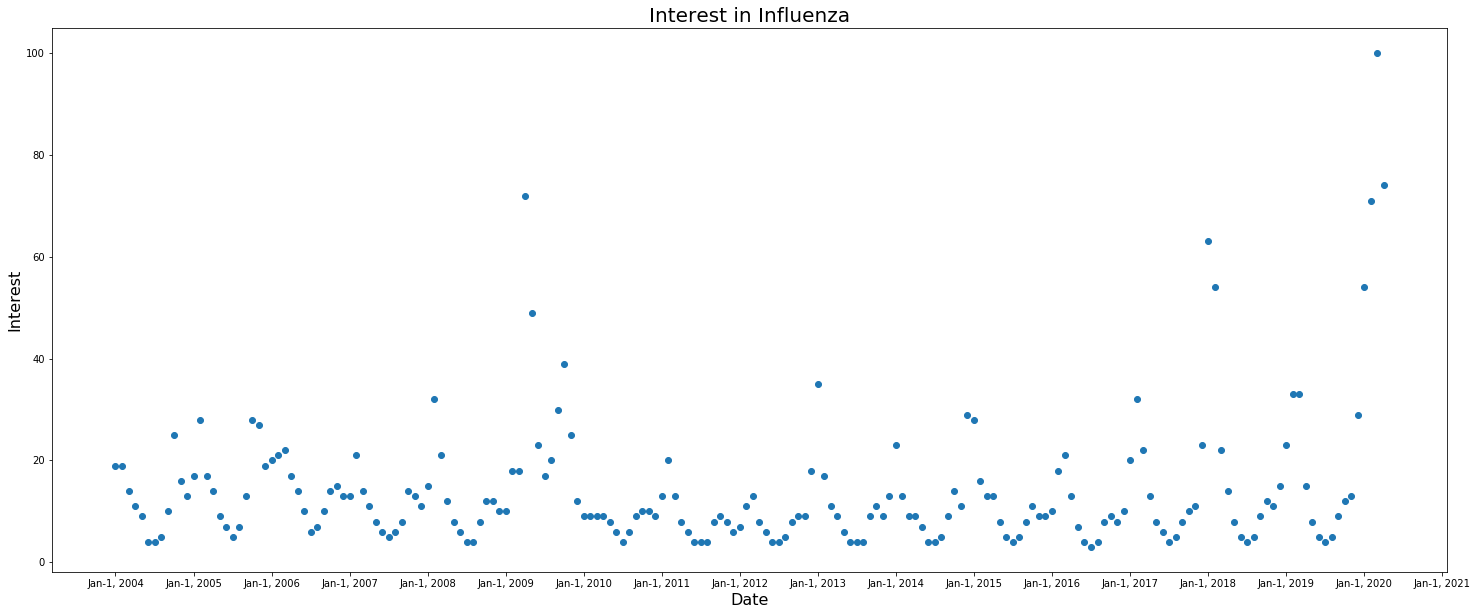

In [421]:
# Path to the data - select the path that works for you 
file_path = '../data/influenza_interest.csv'

# Load the data into a DataFrame 
df = pd.read_csv(file_path)

years = []
months = []
df['Date'] = df['Month']
for i in range(len(df['Month'])):
    years.append(df['Date'][i][:4])
    months.append(df['Date'][i][5:])
df['Year'] = years
df['Month'] = months
df = df[['Date','Month', 'Year', 'Interest']]

fig, ax = plt.subplots(figsize=(25,10))
ax.scatter(df['Date'],df['Interest'])

# Add a title
ax.set_title("Interest in Influenza", fontsize=20)

# Add axis labels
ax.set_xlabel("Date", fontsize=16)
ax.set_ylabel("Interest", fontsize=16)

dateTicks = ['Jan-1, 2004', 'Jan-1, 2005', 'Jan-1, 2006','Jan-1, 2007', 'Jan-1, 2008','Jan-1, 2009','Jan-1, 2010','Jan-1, 2011','Jan-1, 2012','Jan-1, 2013','Jan-1, 2014','Jan-1, 2015','Jan-1, 2016','Jan-1, 2017','Jan-1, 2018','Jan-1, 2019','Jan-1, 2020','Jan-1, 2021']
ax.set_xticks(np.arange(0, 210, 12.0))
ax.set_xticklabels(dateTicks)
# plt.xticks()
 
# plt.show()
df.head()

**Part B:** This data (and the sea-level data from Homework 4) are both **time series**, where the independent variable is *time* and the dependent quantity is interest in influenza (or sea level in the case of HW 4). One of the central assumptions of linear regression is that the data are observations generated by some process, independently of one another. With time series data, we need to be careful because there could be some other process affecting the output data. In particular, **annual cycles** are patterns that reoccur each year and are frequently present in time series data. For example, seasonal patterns of weather are annual cycles.

To see what kind of effect time has, make a **line plot** (using `pyplot.plot`) of the interest in influenza, as a function of time. Again, include all of the data points and, for the x-axis, label only the tick marks associated with January of each year, and be sure to label your axes.

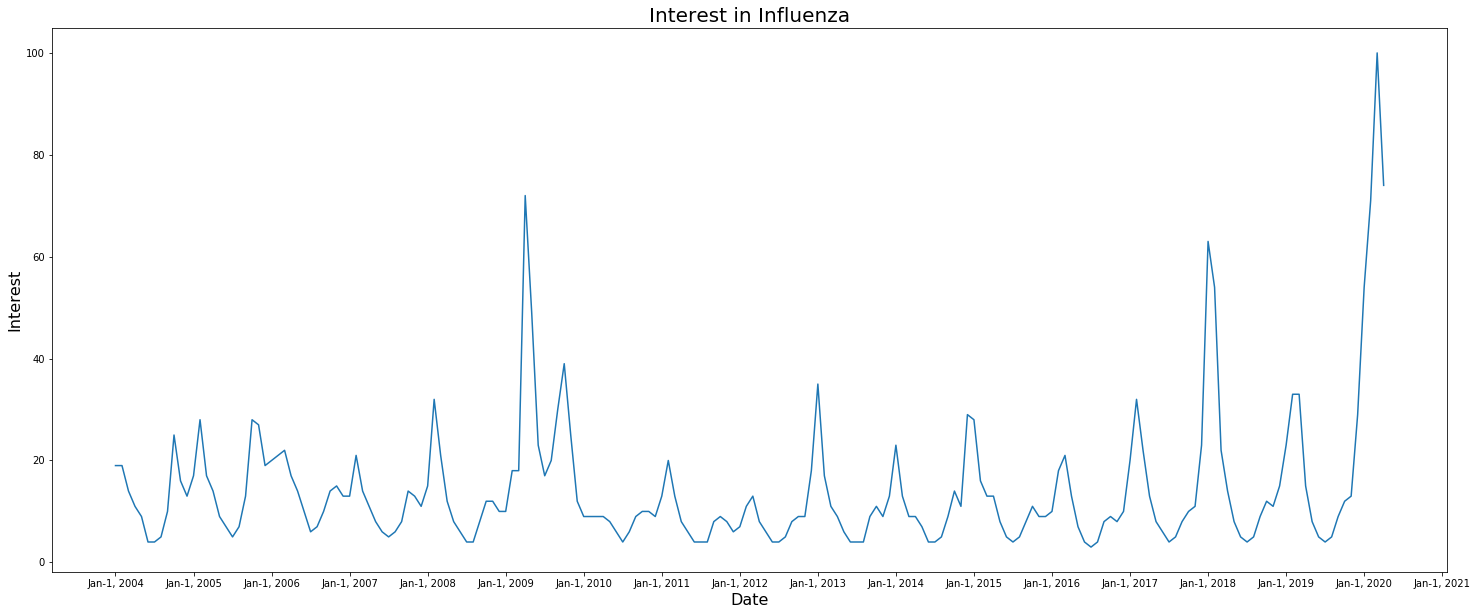

In [422]:
fig, ax = plt.subplots(figsize=(25,10))
ax.plot(df['Interest'])

# Add a title
ax.set_title("Interest in Influenza", fontsize=20)

# Add axis labels
ax.set_xlabel("Date", fontsize=16)
ax.set_ylabel("Interest", fontsize=16)

ax.set_xticks(np.arange(0, 210, 12.0))
ax.set_xticklabels(dateTicks)
# plt.xticks()
plt.show()

**Part C:** Does your plot from Part B suggest that there is some annual cycle to the interest in influenza? During which months is interest in influenza highest? What about lowest? Justify your answers using your plot, **and** by computing the mean interest in influenza for each month. So, compute 12 values and report them in a markdown table. Do **not** just spit out a horizontal list of 12 numbers. That would be yucky to try to read, and we're scientists.

What do you think accounts for the increased interest in influenza during the fall and winter months?

In [423]:
monthlyAverages = []
months = ['01','02','03','04','05','06','07','08','09','10','11','12']
for xi in months:
    tmp = df.loc[df['Month'] == xi]['Interest']
    monthlyAverages.append(tmp.mean())
print(monthlyAverages)

[22.294117647058822, 25.470588235294116, 21.88235294117647, 18.941176470588236, 10.5625, 6.4375, 5.0, 6.0625, 10.25, 14.9375, 12.9375, 14.9375]


| January | February | March | April | May  | June | July | August | September | October | November | December |
| :------ | :------: | :---: | :---: | :--: | :--: | :--: | :----: | :-------: | :-----: | :------: | -------: |
| 22.29   | 25.47    | 21.88 | 18.94 |10.56 | 6.44 | 5.0  | 6.06   | 10.25     | 14.93   | 12.94    | 14.93    | 

The plot from Part B and the table provided above suggest that there is some annual cycle to the interest in influenza. It appears that interest peaks in the colder months of fall and winter and begins to go down in warmer months of spring before ultimately reaching anual minimums in the warmer months of summer. I assume that interest is higher during the colder months because that is when the virus is more active. There are more cases of Influenza in the colder months because viruses typically do not do as well with the heat of warmer months. The interest is highest in the months of Janurary-March and is lowest in the months of June-August.

Influenza is a seasonal disease, people normally get sick from the flu in the fall and winter.

**Part D:** (Spoiler alert!) Since there seems to be an annual cycle, one of the fundamental assumptions of our simple linear regression model is not satisfied. Namely, it is not the case that the model-data residuals, $\epsilon_i$, are independent of one another.

So, we need to process our data a bit further before fitting a regression model. One way to address this is to take the mean of all the data each year and use for analysis the time series of annual mean interest in data science. Write a function (you'll want to use this code again later) that takes in the monthyl DataFrame, and returns a new DataFrame that consists only of two columns:

* `year`, and
* `interest`, the mean interest in data science from all of the months in that year.

Then call this function to convert the monthly data into yearly averages. Print the entire resulting datframe. 

**NOTE:** We have one year with incomplete data in our dataframe. Since 2020 isn't complete yet, we only have 3 months of data for this year. Here, we should compute the average of the three months we have. We'd recommend using a pandas [groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) on the year column to compute averages, but how you do this is up to you. If you do use a group by, you may find the .reset_index dataframe function useful to clean up the output. Don't hardcode the years, or do anything that relies on a year being twelve months. It will make your life harder later in this problem.

In [424]:
df.tail()

,Date,Month,Year,Interest
191,2019-12,12,2019,29
192,2020-01,01,2020,54
193,2020-02,02,2020,71
194,2020-03,03,2020,100
195,2020-04,04,2020,74


In [427]:
def findYearlyDF(dfMonthly):
    years = dfMonthly['Year'].unique()
    yearlyAverages = []
    for xi in years:
        tmp = dfMonthly.loc[dfMonthly['Year'] == xi]['Interest']
        yearlyAverages.append(tmp.mean())
    dfYears = pd.DataFrame(yearlyAverages,columns=['Interest'])
    dfYears['Year'] = years
    dfYears = dfYears[['Year','Interest']]
    dfYears['Year'] = pd.to_numeric(dfYears['Year'])
    dfYears['Interest'] = pd.to_numeric(dfYears['Interest'])
    return dfYears

dfYears = findYearlyDF(df)
dfYears.head(17)

,Year,Interest
0,2004,12.416667
1,2005,15.916667
2,2006,14.083333
3,2007,10.833333
4,2008,12.000000
5,2009,27.750000
6,2010,8.166667
7,2011,8.583333
8,2012,8.500000
9,2013,11.000000


**Part E:** Write a function to fit a a simple linear regression model with `year` as the feature and `interest` as the response (mean annual interest in influenza). You'll need to use this function later. This function should take in a dataframe and return a fitted model. Use the "statsmodels" package (imported below as "sm") to generate the model using their convenient [Ordinary Least Squares model](https://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.OLS.html). Here, you'll want to add a constant term to the feature, so that the statsmodel package can fit the regression model with a non-zero Y intercept. There's a helpful function in the statsmodels package to add a constant term, or you can write code to add the constant yourself, if you wish.

Call the function you wrote to get the regression model of our yearly average interest, then print the parameters of the regression line in the form $Y = \alpha + \beta x$. 

Then make a scatter plot of the mean annual interest in influenza as a function of year, and overlay the estimated regression line. Label your axes and provide a legend.

In [233]:
#STARTER CODE DO NOT CHANGE
import statsmodels.api as sm

Alpha: -2377.9158496732657
Beta: 1.1901552287582016
Y= -2377.9158496732657 + 1.1901552287582016 x


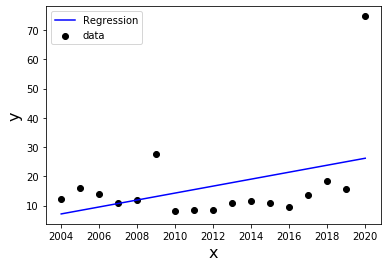

In [428]:
# def regressionTest(dfYears):
#     x = np.array(dfYears['Year'])
#     y = np.array(dfYears['Interest'])
#     xbar = x.mean()
#     ybar = y.mean()
#     numerator = np.array((x-xbar)*(y-ybar)).sum()
#     denominator = np.array((x-xbar)*(x-xbar)).sum()
#     beta = numerator/denominator
#     alpha = ybar - beta*xbar
#     yhat = alpha + beta*x
#     return alpha,beta,yhat

# alpha,beta,yhat = regressionTest(dfYears)

def regression(dfYears):
    y = np.array(dfYears['Interest'])
    x = np.array(dfYears['Year'])
    x = sm.add_constant(x)
    model = sm.OLS(y,x)
    results = model.fit()
    return results.params
    
results = regression(dfYears)
alpha = results[0]
beta = results[1]
print("Alpha:",alpha)
print("Beta:",beta)
print("Y=",alpha,"+",beta,"x")

yhat = []
for x in dfYears['Year']:
    yhat.append(alpha + (beta*x))

# print("y-hat:",yhat)

fig, ax = plt.subplots()
scatter = ax.scatter(dfYears['Year'],dfYears['Interest'],color="black",marker='o',label="data")
line = ax.plot(dfYears['Year'],yhat,color="blue",label="Regression")
ax.set_xlabel("x", fontsize=16)
ax.set_ylabel("y", fontsize=16)
plt.legend()

**Part F**: Give a physical interpretation of the coefficient $\hat{\beta}$, estimated from your model. Include addressing whether the relationship between time and interest in influenza is positive or negative. Fully justify your responses.

Our regression estimated that $\hat{\beta}=1.19$. This can be interpreted that with each increase in year, there is an additional increase of $\approx1.19$ in interest in influenza. Because this is a positive value, the relationship between time and interest in influenza is positive. This suggests that interest in influenza may be growing over time. 

**Part G**: What interest in influenza does your simple linear regression model predict in the year 2050? What about in 2150? How about 1900? Feel free to use the statsmodels .predict() method here. What are potential drawbacks to this model for interest in influenza (think about the minimium and maximum values for the data)? 

**Note**: From Google Trends Documentation, the "interest" variable is defined as: "Interest represent search interest relative to the highest point on the chart for the given region and time. A value of 100 is the peak popularity for the term. A value of 50 means that the term is half as popular. A score of 0 means there was not enough data for this term."

In [258]:
prediction2050 = alpha + (beta*2050)
prediction2150 = alpha + (beta*2150)
prediction1900 = alpha + (beta*1900)
print(prediction1900)
print(prediction2050)
print(prediction2150)

-116.62091503268266
61.90236928104741
180.91789215686777


The model predicts than in 2050, interest will be 61.90, in 2150, interest will be 180.92, and in 1900, the interest was -116.62. There is a problem with the model in that it gives interest levels of above 100 and below 0. Because of the way that google defines "interest" of, the value must be between 0 and 100. Interest cannot go above peak popularity or below 0. This model appears to only work well in years close to our years that we used to generate the model.

**Part H:** Write a function that computes an 90% confidence interval for the slope parameter, $\beta$. You'll need to use this function again later. This function should take in the dataframe of yearly data and a statsmodel linear regression model, and print both the 90% confidence interval for beta and the value of $\hat{\beta}$. You should be performing all calculations yourself in Python. 

**RULES: There is a statsmodels function that computes the confidence interval. Do not use it, write python code yourself to calculate the CI. You may use the statsmodels confidence interval function to check your work if your like. You also may use the statsmodel .predict() method to get predicted values, and the .params attribute to get the slope parameter. Write your own code to calculate the sum of square errors. You may use numpy functions (min, max, mean, var, etc...) and stats functions (ppf/cdf/etc...) where appropriate.**

Call the function to calculate the 90% CI for beta with this model.

In [381]:
def SSE(observed,modeled):
    sse = []
    for i in range(len(observed)):
        sse.append(((observed[i]-modeled[i])**2))
    return sum(sse)
    
def confidenceInterval(dfYears, model):
    yhat = []
    alpha = model[0]
    beta = model[1]
    for x in dfYears['Year']:
        yhat.append(alpha + (beta*x))
    sse = SSE(dfYears['Interest'],yhat)
    variance = sse/(len(yhat)-2)
    sigma = math.sqrt(variance)
    tStat = stats.t.cdf(0.95,df=len(yhat)-2)
    xbar = dfYears['Year'].mean()
    sumX = 0
    for xi in dfYears['Year']:
        sumX += ((xi-xbar)**2)
    stderr = sigma/math.sqrt(sumX)
    print("Beta:",beta)
    print("tStat:",tStat)
    print("stderr:",stderr)
    lowerCI = beta - (tStat*stderr)
    upperCI = beta + (tStat*stderr)
    confidenceInterval = [lowerCI,upperCI]
    return confidenceInterval
    
print("90% Confidence Interval:",confidenceInterval(dfYears, results))

Beta: 1.1901552287582016
tStat: 0.821415549649601
stderr: 0.7412964414090389
90% Confidence Interval: [0.5812428048849027, 1.7990676526315004]


**Part I:** What proportion of the variation in mean annual interest in influenza is explained by your linear regression model? Note: It's fine to use the model .summary method here. You do not need to calculate this by hand.

In [318]:
def SSR(observed,modeled):
    ssr = []
    for i in range(len(observed)):
        ssr.append(((modeled[i]-observed[i])**2))
    return sum(ssr)
def SST(Observed):
    sst = []
    ybar = Observed.mean()
    for yi in Observed:
        sst.append((yi-ybar)**2)
    return sum(sst)
sse = SSE(dfYears['Interest'],yhat)
ssr = SSR(dfYears['Interest'],yhat)
sst = SST(dfYears['Interest'])
rSqrd = (sst-sse)/sst
print("R-Squared:",rSqrd)

R-Squared: 0.14664344569714988


With the calculations above, 14.66% of the total variation in the data is explained by the model. This is found by calculating the $R^2$ value by solving: $\frac{SST-SSE}{SST}$.

**Part J:** Ouch, so that model doesn't really explain very much of the variance in the data! Maybe we have some outliers in our data. Use your original monthly dataframe and drop any rows that have an interest value greater than or equal to the 97th percentile of our data. Print the number of rows remaining.

In [376]:
# Path to the data - select the path that works for you 
file_path = '../data/influenza_interest.csv'

# Load the data into a DataFrame 
df = pd.read_csv(file_path)

years = []
months = []
df['Date'] = df['Month']
for i in range(len(df['Month'])):
    years.append(df['Date'][i][:4])
    months.append(df['Date'][i][5:])
df['Year'] = years
df['Month'] = months
df = df[['Date','Month', 'Year', 'Interest']]

z = stats.norm.ppf(0.97)
sigma = df['Interest'].std()
mu = df['Interest'].mean()
X = (sigma*z)+mu
df.drop(df[df['Interest'] > X ].index , inplace=True)
print("Number of rows remaining:",df.shape[0])

Number of rows remaining: 188


**Part K:** In this problem, you'll use the functions you wrote in parts **D**, **E**, and **H** to process your new outlier free data, then fit a regression model and calculate the confidence interval on the slope parameter of the new model. First, use your function from part **D** to get the yearly averages. Second, use the function from part **E** to fit a linear regression model to the yearly averages. Finally, use the function you wrote in **H** to print the 90% confidence interval of the slope and the estimated slope.

In [393]:
newDfYears = findYearlyDF(df)
newResults = regression(newDfYears)
newCI = confidenceInterval(newDfYears,newResults)
print("90% Confidence Interval:",newCI)
print("Estimated Slope:",newResults[1])

Beta: -0.12843137254902914
tStat: 0.8208874836401079
stderr: 0.18667154171481665
90% Confidence Interval: [-0.2816677046945244, 0.024804959596466114]
Estimated Slope: -0.12843137254902914


**Part L:** Our estimate for beta, the slope parameter in part **K** should have come out to be slightly negative, and also should have had a confidence interval that included zero (check your work if it didn't). What does this tell us about our data? Does it seem like interest in Influenza is increasing or decreasing over time? Or is the interest in Influenza more affected by yearly trends and high peaks in intrest during especially bad years for flu (or flu like diseases)?

After taking out the outliers in the data set, our confidence interval includes 0 and our $\hat{\beta}=-0.128$. This tells us that the data is relatively flat. It does not seem that Influenza is increasing or decreasing over time. What appears to affect the interest level is the time of the year and how bad of a flu year it is.